### Codio Activity 10.1: Working with Dates in `pandas`

This activity focuses on working with datetime objects in pandas.  There is a good deal of functionality built into a DataFrame when working with datetime objects.  Specifically, you will examine how to convert dates to datetime objects using `pd.to_datetime`.  Also, you will examine how to use pandas to set the datetime as an index and use the dates to select specific data. 

#### Index

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)


In [2]:
import pandas as pd
import numpy as np

### Problem 1

#### Using `pd.to_datetime`

As you saw demonstrated, the `pd.to_datetime` function takes in a string representing a date and converts it to a datetime object.  This is a specific datatype in pandas.  Below, you are given a string `adate` representing a date, and are to use the `to_datetime` method to convert the string to a datetime object.  Assign your solution as `adatetime` below.

In [2]:
adate = '01-01-2000'
adatetime = ''

In [3]:
adatetime = pd.to_datetime(adate)
adatetime

Timestamp('2000-01-01 00:00:00')

In [4]:
type(adatetime)

pandas._libs.tslibs.timestamps.Timestamp

### Problem 2

#### Dates in a `DataFrame`

Below, you are given a small DataFrame `sample_df` with two columns -- `date` and `price`.  The `date` features is string datatype.  You are to change the column to a datetime object.

Update the `date` column of the `data` DataFrame as datetime type.  

In [3]:
data = {'price': [10.24, 11.34, 14.72, 13.90, 15.03],
       'date': ['11-01-2020', '11-02-2021', '11-03-2021', '11-04-2021', '11-05-2021']}
sample_df = pd.DataFrame(data)
sample_df

,price,date
0,10.24,11-01-2020
1,11.34,11-02-2021
2,14.72,11-03-2021
3,13.90,11-04-2021
4,15.03,11-05-2021


In [6]:
sample_df['date'] = pd.to_datetime(sample_df['date'])
sample_df

,price,date
0,10.24,2020-11-01
1,11.34,2021-11-02
2,14.72,2021-11-03
3,13.90,2021-11-04
4,15.03,2021-11-05


In [9]:
sample_df.dtypes

price           float64
date     datetime64[ns]
dtype: object

### Problem 3

#### Extracting information from `datetime` objects

If a pandas series has a column of type `datetime` you can extract information about the given date using the `.dt` function followed by the appropriate datetime method.  For example, in the above problem we would be able to extract the month of each row with:

```python
sample_df['date'].dt.month
```

Below, a DataFrame containing oil prices in Bolivia is loaded.  You are to convert the `date` column to a datetime object and create a new column named `month` that contains the month of each price observation.

In [4]:
oil = pd.read_csv('codio_10_1_solution/data/oil.csv')
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [5]:
oil.dtypes

date           object
dcoilwtico    float64
dtype: object

In [6]:
oil['date'] = pd.to_datetime(oil['date'])

In [7]:
oil['month'] = oil['date'].dt.month

In [8]:
oil.head()

,date,dcoilwtico,month
0,2013-01-01,NaN,1
1,2013-01-02,93.14,1
2,2013-01-03,92.97,1
3,2013-01-04,93.12,1
4,2013-01-07,93.20,1


In [9]:
print('Counts of months in data\n==================')
print(oil['month'].value_counts())

Counts of months in data
month
1     111
5     111
7     111
3     110
8     110
4     107
6     107
2     101
12     90
10     89
9      87
11     84
Name: count, dtype: int64


### Problem 4

#### Slicing data with `datetime` index

One feature of using a `datetime` as an index is the ability to slice data using the dates.  For example, in the below data containing Microsoft stock data from the year 2020, once the date column is converted to `datetime` and is set as the index, we could slice all dates after March 1st with

```python
msft['2020-03-01':]
```
Using the `msft` data, change the `Date` column to `datetime` and set it to the index of the DataFrame.  Use the datetime index to select days between June 21st and September 22nd.  Assign the slice to the variable `msft_summer` below. 

In [10]:
msft = pd.read_csv('codio_10_1_solution/data/msft.csv')
msft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   High       253 non-null    float64
 2   Low        253 non-null    float64
 3   Open       253 non-null    float64
 4   Close      253 non-null    float64
 5   Volume     253 non-null    float64
 6   Adj Close  253 non-null    float64
dtypes: float64(6), object(1)
memory usage: 14.0+ KB


In [11]:
msft['Date'] = pd.to_datetime(msft['Date'])

In [30]:
msft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       253 non-null    datetime64[ns]
 1   High       253 non-null    float64       
 2   Low        253 non-null    float64       
 3   Open       253 non-null    float64       
 4   Close      253 non-null    float64       
 5   Volume     253 non-null    float64       
 6   Adj Close  253 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 14.0 KB


In [20]:
msft.set_index('Date', inplace = True)

In [18]:
msft_summer0 = msft[(msft['Date'] >= '2020-06-21') & (msft['Date'] <= '2020-09-22')]
msft_summer0

,Date,High,Low,Open,Close,Volume,Adj Close
118,2020-06-22,200.759995,195.229996,195.789993,200.570007,32818900.0,197.904968
119,2020-06-23,203.949997,201.429993,202.089996,201.910004,30917400.0,199.227173
120,2020-06-24,203.250000,196.559998,201.600006,197.839996,36740600.0,195.211227
121,2020-06-25,200.610001,195.470001,197.800003,200.339996,27803900.0,197.678024
122,2020-06-26,199.889999,194.880005,199.729996,196.330002,54675800.0,193.721298
...,...,...,...,...,...,...,...
178,2020-09-16,210.649994,204.639999,210.619995,205.050003,26328100.0,202.814529
179,2020-09-17,204.330002,199.960007,200.050003,202.910004,34011300.0,200.697845
180,2020-09-18,203.649994,196.250000,202.800003,200.389999,55225300.0,198.205307
181,2020-09-21,202.710007,196.380005,197.190002,202.539993,39839700.0,200.331879


In [23]:
msft.index[0]

Timestamp('2020-01-02 00:00:00')

In [24]:
msft_summer = msft['2020-06-21':'2020-09-22']
msft_summer

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-22,200.759995,195.229996,195.789993,200.570007,32818900.0,197.904968
2020-06-23,203.949997,201.429993,202.089996,201.910004,30917400.0,199.227173
2020-06-24,203.250000,196.559998,201.600006,197.839996,36740600.0,195.211227
2020-06-25,200.610001,195.470001,197.800003,200.339996,27803900.0,197.678024
2020-06-26,199.889999,194.880005,199.729996,196.330002,54675800.0,193.721298
...,...,...,...,...,...,...
2020-09-16,210.649994,204.639999,210.619995,205.050003,26328100.0,202.814529
2020-09-17,204.330002,199.960007,200.050003,202.910004,34011300.0,200.697845
2020-09-18,203.649994,196.250000,202.800003,200.389999,55225300.0,198.205307


### Codio Activity 10.2: Computing Autocorrelation

This activity focuses on computing the autocorrelation of a time series dataset.  You will use `statsmodels` to compute autocorrelation and determine whether or not the series is stationary.  Finally, you are to difference the data and see if the resulting series is itself stationary.  

In [32]:
import numpy as np
import pandas as pd
from statsmodels.tsa import arima_process
import matplotlib.pyplot as plt
import warnings

from statsmodels.datasets import nile
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
warnings.filterwarnings("ignore")

### Problem 1

#### Creating a dataset with `ArmaProcess`

Following video 10.3, create an `arima_process` using the arguments:

- `ar = [.9, -0.3]`
- `ma = [2]`

Assign this as an `ArmaProcess` object to `process` below.

In [34]:
process = arima_process.ArmaProcess(ar = [.9, -.3], ma = [2])
process

ArmaProcess([0.9, -0.3], [2.0], nobs=100) at 0x178fe4410

In [35]:
process.ar

array([ 0.9, -0.3])

In [36]:
process.ma

array([2.])

### Problem 2

#### Generating a sample

<center>
    <img src = images/arma1.png/>
</center>


Next, you are to generate a sample of size 100 from the arima_process created in [Problem 1](#Problem-1).  To assure consistent results, make sure to leave the `np.random.seed(32)`.  This assures the same sample will be generated time after time.

In [37]:
np.random.seed(32)
sample = process.generate_sample(100)

In [38]:
sample

array([-0.775321  ,  1.9275673 ,  1.93346206,  0.800675  ,  1.99474206,
        1.95815568,  3.92336417,  5.00374586,  1.08752168, -1.16788569,
       -1.93356915,  3.66752908,  5.23454345,  2.7588786 , -0.35773389,
        0.13448982,  3.40834276,  1.91640723,  0.44117305,  2.18473374,
        1.85190042, -1.19441344,  0.46664208, -0.78881369, -0.17488645,
       -1.23154864, -1.54452439, -2.48880846,  1.58734103,  2.02554093,
       -1.69663533,  2.14123263,  8.18866098,  0.88010165, -0.46296252,
       -4.28447983, -1.42633091,  0.30583299,  3.4830751 , -0.35113972,
        1.96752611, -0.85841288, -0.73302225, -0.2832044 , -4.06753953,
       -3.24860257, -4.70131932,  0.58177742,  0.31196046,  0.74779333,
        0.38802964, -2.31094285, -0.48024081, -0.57194041, -3.17005731,
       -1.7767295 ,  2.70634213,  3.820088  , -0.13144626, -0.9139783 ,
       -5.56798322, -3.16862532, -4.8628785 , -4.53840707, -0.50440324,
       -4.13107951,  1.79078646, -0.17129031,  2.16214197,  2.33

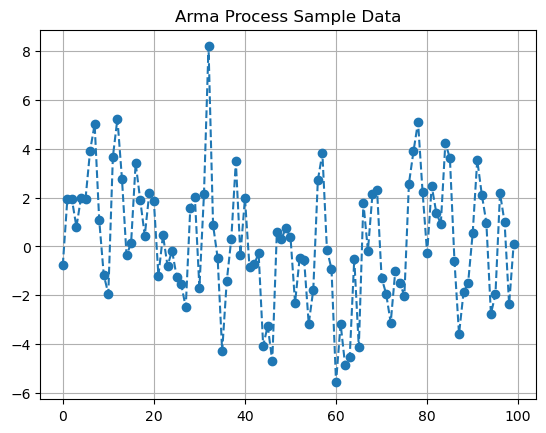

In [39]:
## Uncomment to plot the sample
plt.plot(sample, '--o')
plt.title('Arma Process Sample Data')
plt.grid();

### Problem 3

#### Computing the autocorrelation

Use the `sample` created above together with the `acf` function from statsmodels to compute the autocorrelation values for the sample.  Assign these values to `auto_corr` as an array below.  **Note**: Set `fft = True` in the acf function to avoid a warning.

<center>
    <img src = 'images/arma2.png'/>
</center>

In [40]:
auto_corr = acf(sample, fft = True)

In [41]:
auto_corr

array([ 1.        ,  0.4551546 ,  0.09938926, -0.05894484, -0.05016599,
        0.03048867, -0.00128126,  0.07544164,  0.12439175,  0.17682815,
        0.13026721,  0.05529089,  0.0626226 , -0.06915561, -0.07047414,
        0.02284482,  0.04297037,  0.00200415,  0.00185332,  0.04807347,
        0.04917668])

Text(0.5, 1.0, 'Autocorrelation Function (ACF) Plot')

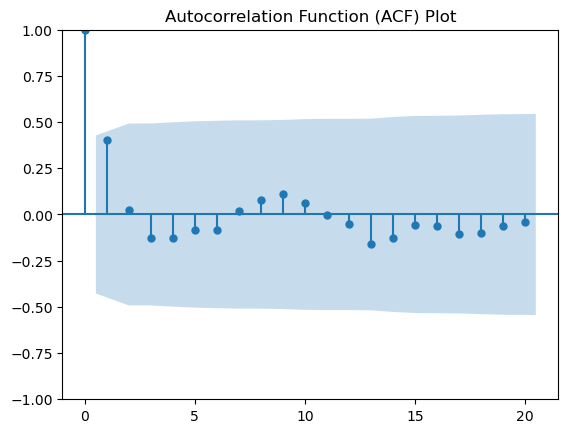

In [48]:
plot_acf(auto_corr, lags = 20)
plt.title("Autocorrelation Function (ACF) Plot")

### Problem 4

#### Using `acf` to compute autocorrelation

Below, a dataset relating the volume of flow in the Nile river from statsmodels is loaded  and visualized.  Use the `acf` function from statsmodels to compute the autocorrelation values of the `volume` feature. Assign your results as an array to `nile_acf` below.  

Visualizing the autocorrelation data using the `plot_acf` function from statsmodels generates:

<center>
    <img src = 'images/ar4.png' />
</center>

Does this suggest the data is stationary?  Why or why not?

In [49]:
nile_df = nile.load_pandas().data
nile_df.head()

,year,volume
0,1871.0,1120.0
1,1872.0,1160.0
2,1873.0,963.0
3,1874.0,1210.0
4,1875.0,1160.0


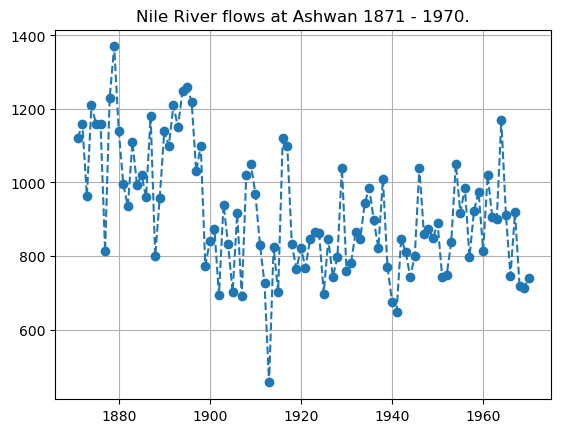

In [50]:
plt.plot(nile_df['year'], nile_df['volume'], '--o')
plt.title('Nile River flows at Ashwan 1871 - 1970.')
plt.grid();

In [51]:
nile_acf = acf(nile_df['volume'], fft = True)

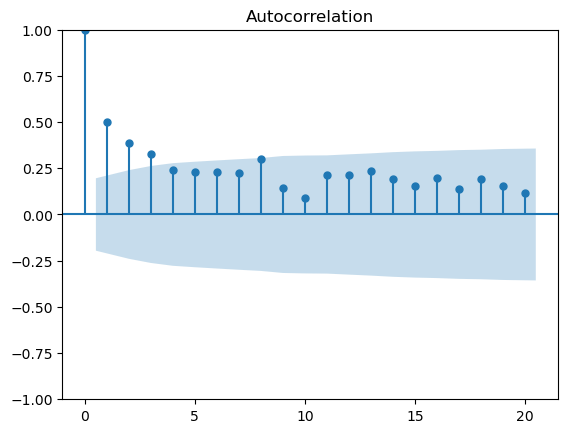

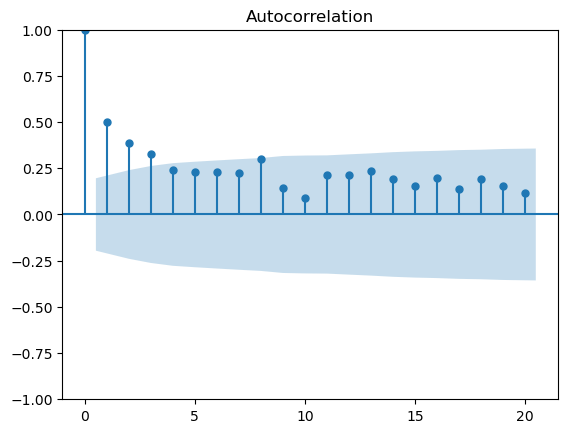

In [53]:
plot_acf(nile_df['volume'])

### Problem 5

#### Tesla and stationarity

Below, stock data from Tesla corporation are loaded from the beginning of the year 2020.  The Adjusted Closing price is plotted below.  You are to use the autocorrelation plots to determine which version of the data is stationary.  Assign one of the following strings to `ans5` below:

- `original`: the original adjusted closing price is stationary
- `first_diff`: the first difference of the adjusted closing price is stationary
- `neither`: neither the original time series or its first difference are stationary



In [55]:
tsla = pd.read_csv('codio_10_2_solution/data/tsla.csv', index_col='Date')
tsla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002
2020-01-03,90.800003,87.384003,88.099998,88.601997,88892500.0,88.601997
2020-01-06,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999
2020-01-07,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996
2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500.0,98.428001


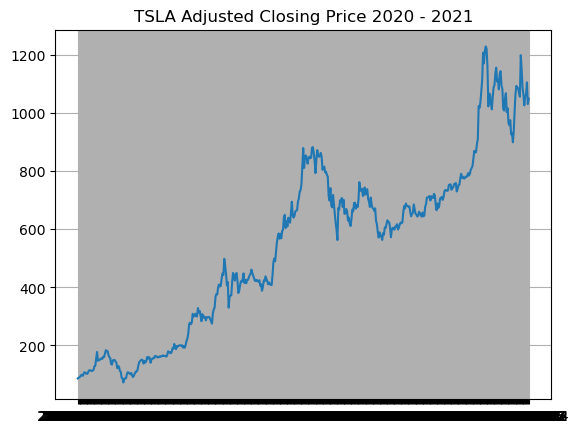

In [56]:
plt.plot(tsla['Adj Close'])
plt.grid()
#plt.xticks(rotation = 40)
plt.title('TSLA Adjusted Closing Price 2020 - 2021');

In [57]:
ans5 = 'first_diff'

### Codio Activity 10.3: Decomposition

This activity focuses on performing a decomposition of a time series following the discussion in videos 10.6 - 10.9.  You will build models on time series using statsmodels and its decomposition capabilities.

### The Data

For this activity, we use a different built in dataset from statsmodels containing monthly measurements of CO2 at the Mauna Loa Observatory in Hawaii.  From the documentation:

```
An Applied Physics Corporation (APC) nondispersive infrared gas analyzer was used to obtain atmospheric CO2 concentrations, based on continuous data (four measurements per hour) from atop intake lines on several towers. Steady data periods of not less than six hours per day are required; if no such six-hour periods are available on any given day, then no data are used that day. Weekly averages were calculated for most weeks throughout the approximately 44 years of record. The continuous data for year 2000 is compared with flask data from the same site in the graphics section
```

Note that the measurements are in monthly steps.  Your goal is to build a model for the CO2 measurements using decomposition with statsmodels tools.  We will use both the `STL` and `STLForecast` objects to accomplish this.  

Below, the data is loaded and cleaned up.  

In [25]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.filters.filtertools import convolution_filter
import statsmodels.graphics.tsaplots as tsplots
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA

In [36]:
temp = sm.datasets.get_rdataset("CO2").data


In [35]:
temp = sm.datasets.get_rdataset("CO2").data
temp

,time,value
0,1959.000000,315.42
1,1959.083333,316.31
2,1959.166667,316.50
3,1959.250000,317.56
4,1959.333333,318.13
...,...,...
463,1997.583333,362.57
464,1997.666667,360.24
465,1997.750000,360.83
466,1997.833333,362.49


In [37]:
temp2 = temp.set_index(pd.date_range('1-1-1959', periods = len(temp), freq = 'M'))
temp2

/var/folders/s9/ml6qrgdx03zdn76qyj8422mh0000gn/T/ipykernel_897/1398307296.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  temp2 = temp.set_index(pd.date_range('1-1-1959', periods = len(temp), freq = 'M'))


,time,value
1959-01-31,1959.000000,315.42
1959-02-28,1959.083333,316.31
1959-03-31,1959.166667,316.50
1959-04-30,1959.250000,317.56
1959-05-31,1959.333333,318.13
...,...,...
1997-08-31,1997.583333,362.57
1997-09-30,1997.666667,360.24
1997-10-31,1997.750000,360.83
1997-11-30,1997.833333,362.49


In [45]:
pd.date_range(start="2020-1-1", end="2020-5-31", freq="5h")

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 05:00:00',
               '2020-01-01 10:00:00', '2020-01-01 15:00:00',
               '2020-01-01 20:00:00', '2020-01-02 01:00:00',
               '2020-01-02 06:00:00', '2020-01-02 11:00:00',
               '2020-01-02 16:00:00', '2020-01-02 21:00:00',
               ...
               '2020-05-28 23:00:00', '2020-05-29 04:00:00',
               '2020-05-29 09:00:00', '2020-05-29 14:00:00',
               '2020-05-29 19:00:00', '2020-05-30 00:00:00',
               '2020-05-30 05:00:00', '2020-05-30 10:00:00',
               '2020-05-30 15:00:00', '2020-05-30 20:00:00'],
              dtype='datetime64[ns]', length=725, freq='5h')

In [46]:
pd.date_range(start="2020-1-1", periods = 5, freq="M")

/var/folders/s9/ml6qrgdx03zdn76qyj8422mh0000gn/T/ipykernel_897/3607051508.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.date_range(start="2020-1-1", periods = 5, freq="M")


DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31'],
              dtype='datetime64[ns]', freq='ME')

In [56]:
# periods = 5 means 5 time rows
# freq = 'MS' means: month starts first day 01-01
# freq = 'M' means: month end 03-31
pd.date_range(start="2018-1-1", periods = 5, freq="MS")

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01'],
              dtype='datetime64[ns]', freq='MS')

In [55]:
# co2 = sm.datasets.get_rdataset('co2')
# co2 = co2.data
# co2['time'] = pd.to_datetime(co2['time'])
# co2 = co2.set_index(pd.date_range('1-1-1959', periods = len(co2), freq = 'M')).drop('time', axis = 1)

In [58]:
co2 = temp.set_index(pd.date_range('1-1-1959', periods = len(temp), freq = 'M')).drop('time', axis = 1)

/var/folders/s9/ml6qrgdx03zdn76qyj8422mh0000gn/T/ipykernel_897/2367107426.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  co2 = temp.set_index(pd.date_range('1-1-1959', periods = len(temp), freq = 'M')).drop('time', axis = 1)


In [59]:
co2.head()

,value
1959-01-31,315.42
1959-02-28,316.31
1959-03-31,316.50
1959-04-30,317.56
1959-05-31,318.13


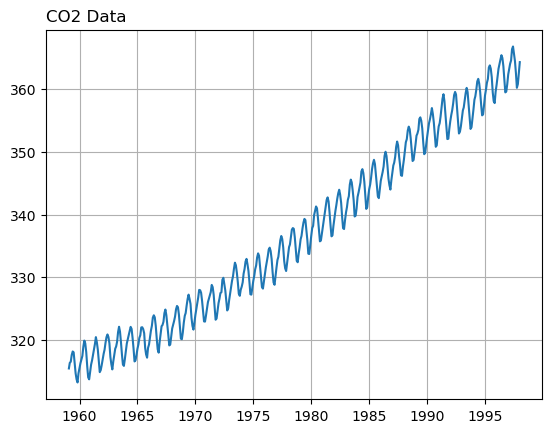

In [60]:
plt.plot(co2)
plt.title('CO2 Data', loc = 'left')
plt.grid();

### Problem 1

#### Build historical and future datasets

To begin, split the data at the year 1995.  Observations prior to 1995 will be `y_hist` and values after will be `y_future`.  Uncomment the code to plot your results.  

In [61]:
y_hist = co2[:'01-01-1995']
y_hist.head()

,value
1959-01-31,315.42
1959-02-28,316.31
1959-03-31,316.50
1959-04-30,317.56
1959-05-31,318.13


In [62]:
y_future = co2['01-01-1995':]
y_future.head()

,value
1995-01-31,359.98
1995-02-28,361.03
1995-03-31,361.66
1995-04-30,363.48
1995-05-31,363.82


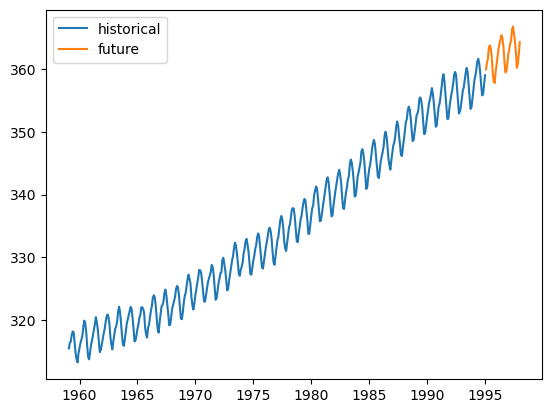

In [63]:
plt.plot(y_hist, label = 'historical')
plt.plot(y_future, label = 'future')
plt.legend();

### Problem 2

#### Extracting the trend

For our exercise, you will use a built in estimator from statsmodels -- the `STL` model.  To use this model, create an instance of the `STL` estimator and pass `y_hist` and a period value of 12.  

Use the `stl` instance to fit the model, assigning the fit results to `results` below.  This results object will contain the trend as an attribute.  Uncomment the code to see the trend plotted with the original data after fitting.

In [64]:
stl = STL(y_hist, period = 12)

In [65]:
results = stl.fit()

In [67]:
trend = results.trend
trend

1959-01-31    315.337913
1959-02-28    315.424206
1959-03-31    315.511371
1959-04-30    315.599196
1959-05-31    315.687369
                 ...    
1994-08-31    359.136451
1994-09-30    359.310324
1994-10-31    359.484762
1994-11-30    359.659857
1994-12-31    359.835683
Freq: ME, Name: trend, Length: 432, dtype: float64

Text(0.5, 1.0, 'Trend with CO2 Data')

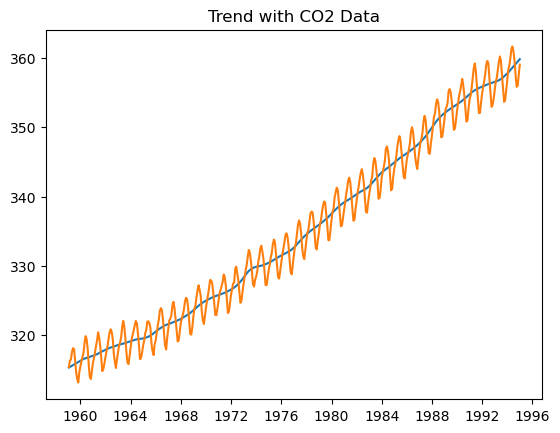

In [66]:
plt.plot(results.trend)
plt.plot(y_hist)
plt.title('Trend with CO2 Data')

### Problem 3

#### Model Historical Data

As demonstrated in the lectures, additive or multiplicative models can be used to combine the seasonality and trend.  Here, the `results` object is an additive model, meaning that to reproduce our training data involves adding the `.seasonal` attribute to the `.trend` attribute.  


Do this below and assign the added season and trend to the variable `season_and_trend` below.  Uncomment the code to view the plot for the last three years of the historical data.

In [70]:
season_and_trend = results.seasonal + results.trend
season_and_trend

1959-01-31    315.274231
1959-02-28    316.085999
1959-03-31    316.430719
1959-04-30    317.605713
1959-05-31    318.408547
                 ...    
1994-08-31    357.492571
1994-09-30    355.801192
1994-10-31    356.050234
1994-11-30    357.464359
1994-12-31    358.944596
Freq: ME, Length: 432, dtype: float64

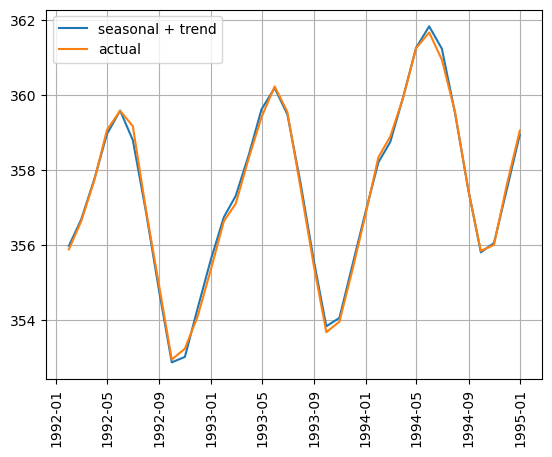

In [71]:
plt.plot(season_and_trend['1992':], label = 'seasonal + trend')
plt.plot(y_hist['1992':], label = 'actual')
plt.grid()
plt.legend()
plt.xticks(rotation = 90);

### Problem 4

#### Examining the residuals

The `results` object also contains information on the residuals in the `.resid` attribute.  Use the plot below to determine if the residuals are stationary or not.  Assign your answer as a string `yes` or `no` to `stationary` below.

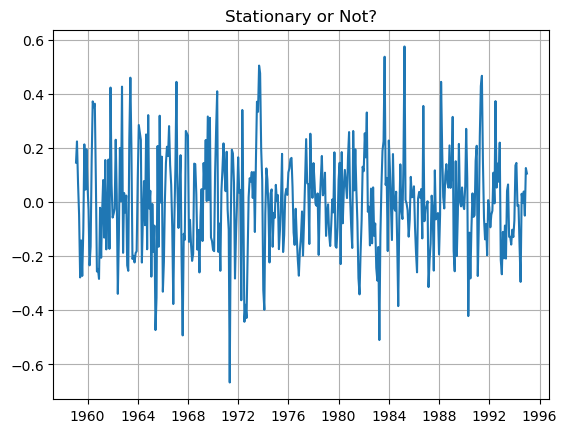

In [72]:
plt.plot(results.resid)
plt.grid()
plt.title('Stationary or Not?');

In [73]:
stationary = 'yes'

### Problem 5

#### Examining Error in Forecast

Finally, to use statsmodels to forecast we will use the `STLForecast` object together with the `ARIMA` model.  This is a model you will discuss in the coming videos, but essentially it helps to extend the trend from the historical data.  Once the estimator is fit on the historical data, a forecast for the future is generated by using the `.forecast` method and passing it the number of time steps forward to project.  

Below, you are to use the `y_future` and `forecast` to determine the prediction error as

```
y_future.value - forecast
```
Use this to compute the Mean Absolute Error and Root Mean Squared Error as `mae` and `rmse` respectively.

In [74]:
#instantiate
stlf = STLForecast(y_hist, ARIMA, model_kwargs={'order':(1, 1, 0), 'trend':"t"})
#fit model using historical data
stlf_results = stlf.fit()
#produce forecast for future data
forecast = stlf_results.forecast(len(y_future))

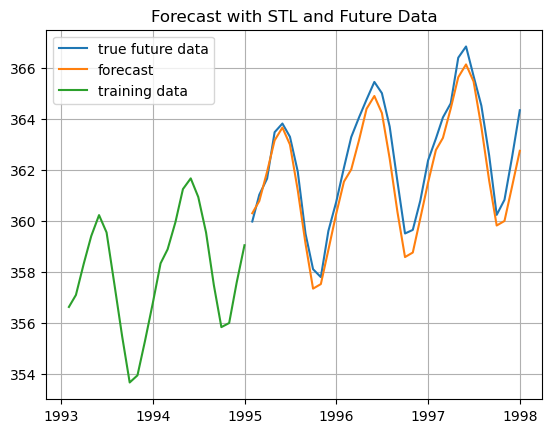

In [75]:
plt.plot(y_future, label = 'true future data')
plt.plot(forecast, label = 'forecast')
plt.plot(y_hist['1993':], label = 'training data')
plt.legend()
plt.title('Forecast with STL and Future Data')
plt.grid();

In [76]:
pred_error = y_future.value - forecast
mae = np.abs(pred_error).mean()
rmse = np.sqrt((pred_error**2).mean())
### END SOLUTION

# Answer check
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MAE: 0.6708980032003559
RMSE: 0.7560629283003923


### Codio Activity 10.4: Hypothesis Testing for Stationarity

This activity introduces an approach to run hypothesis tests on series to determine whether they are stationary or not.  The test is called the **Dicky Fuller Test**.  Similar to your earlier work with hypothesis tests, a null and alternative hypothesis are generated and a threshold determined.  Based on a $p$ value the hypothesis is either rejected or not rejected. 

#### Index

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt


import statsmodels.api as sm
from statsmodels.tsa.filters.filtertools import convolution_filter
import statsmodels.graphics.tsaplots as tsplots
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

### The Data

This example uses historical recruitment data from the year 1950 through 1987 and stock data from Google's Alphabet stock ticker.  For both series you will examine the results of the Dickey Fuller test for stationarity.  

In [3]:
recruitment = pd.read_csv('codio_10_4_solution/data/recruitment.csv', index_col=0, infer_datetime_format=True)

recruitment.index = pd.to_datetime(recruitment.index)

/var/folders/s9/ml6qrgdx03zdn76qyj8422mh0000gn/T/ipykernel_1766/1840584281.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  recruitment = pd.read_csv('codio_10_4_solution/data/recruitment.csv', index_col=0, infer_datetime_format=True)


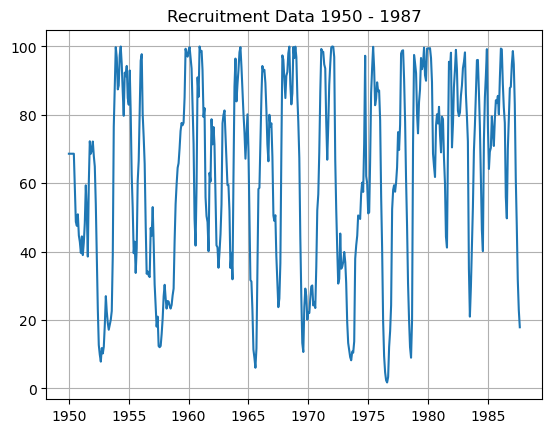

In [4]:
plt.plot(recruitment)
plt.title('Recruitment Data 1950 - 1987')
plt.grid();

### Problem 1

#### Using the `adfuller` object

The `adfuller` object tests the null hypothesis on the series **is not** stationary.  The results contain information including the test statistic and $p$-value. You can compare the test statistic to the significance values for alphas .01, .05, and .1.  Remember that if your test statistic is outside these significance levels you would reject the null hypothesis.  

Use the `results` object and the help from the `adfuller` documentation below to determine if the recruitment series is stationary.  Assign your response as a string to `ans1` below -- 'yes' or 'no'. 

```
Returns
-------
adf : float
    The test statistic.
pvalue : float
    MacKinnon's approximate p-value based on MacKinnon (1994, 2010).
usedlag : int
    The number of lags used.
nobs : int
    The number of observations used for the ADF regression and calculation
    of the critical values.
critical values : dict
    Critical values for the test statistic at the 1 %, 5 %, and 10 %
    levels. Based on MacKinnon (2010).
icbest : float
    The maximized information criterion if autolag is not None.
resstore : ResultStore, optional
    A dummy class with results attached as attributes.
```

In [5]:
results = adfuller(recruitment)
results

(np.float64(-6.239970407069512),
 np.float64(4.7233812728107004e-08),
 12,
 440,
 {'1%': np.float64(-3.445299682487321),
  '5%': np.float64(-2.8681312035123967),
  '10%': np.float64(-2.570280872933884)},
 np.float64(3193.5098343134127))

In [6]:
ans1 = 'yes'

### Problem 2

#### Tesla and Stationarity

Now, your goal is to examine the stationarity of Tesla's stock data.  Below, the data is loaded as `tsla` and you are to examine the `Adj Close` feature to determine whether or not the series is stationary.  Assign your results as a string to `ans2` below -- `yes` or `no`.  

In [8]:
tsla = pd.read_csv('codio_10_4_solution/data/tsla.csv', index_col='Date')
tsla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002
2020-01-03,90.800003,87.384003,88.099998,88.601997,88892500.0,88.601997
2020-01-06,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999
2020-01-07,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996
2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500.0,98.428001


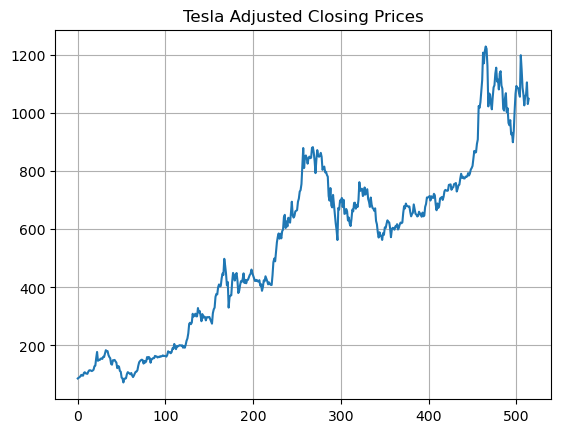

In [9]:
plt.plot(tsla['Adj Close'].values)
plt.title('Tesla Adjusted Closing Prices')
plt.grid();

In [10]:
ans2 = 'no'

### Problem 3

#### Examining the differenced data

When the original series may not be stationary, you may be interested instead in the differenced data.  

Below, create a series resulting from differencing the `Adj Close` feature using `diff()` and from dropping the missing values using `dropna()`. Assign this differenced series as `adj_diff`.

Then, use the `adfuller` results to determine if the series is stationary.  Assign your response as a string to `ans3` below. 

In [11]:
adj_diff = tsla['Adj Close'].diff().dropna()
ans3 = 'yes'

Date
2020-01-03    2.549995
2020-01-06    1.706001
2020-01-07    3.503998
2020-01-08    4.616005
2020-01-09   -2.160004
Name: Adj Close, dtype: float64
yes


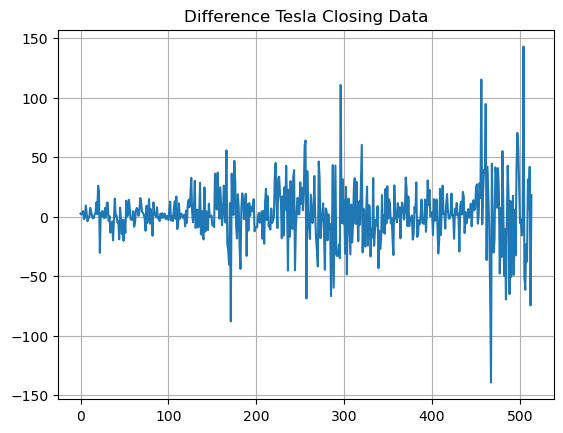

In [12]:
plt.plot(adj_diff.values)
plt.title('Difference Tesla Closing Data')
plt.grid();
print(adj_diff.head())
print(ans3)# yes or no

### Problem 4

#### Stationarity of residuals in a decomposition model

Below, use the `recruitment` data to build a decomposition model using `STL` with all arguments default. Assign this resul to `stl`.

Use the `fit` function on `stl` to fit your results and assign the result to the variable `results`.

Pass these residuals to the `adfuller` object and decide whether or not the residuals are stationary at the 0.05 level.  Assign your answer as a string to `ans4` below.

In [13]:
stl = STL(recruitment)
results = stl.fit()
ans4 = 'yes' if adfuller(results.resid)[1] < 0.05 else 'no'

In [14]:
ans4

'yes'

Using the **Dickey Fuller** test is important as some of our models will expect stationary data.  This test gives a basic tool for determining whether a series is stationary outside of the general eye test.  You should understand that an increasing or decreasing series is not going to be stationary.  